## **线性回归**

线性回归输出是一个连续值，因此适用于回归问题。回归问题在实际中很常见，例如预测房屋价格、气温、销售量等连续的问题。

与回归问题不同，分类问题中模型的最终输出是一个离散值。我们所说的图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题的范畴。softmax回归则适用于分类问题。

由于线性回归和softmax回归都是单层神经网络，它们涉及的概率和技术同样适用于大多数的深度学习模型。


### **线性回归的基本要素**

#### **1、模型**

线性回归假设输出与各个输入之间是线性关系： <font size=4> $\widehat{y} = x_1w_1 + x_2w_2 + b $</font> ; 其中 $\widehat{y}$ 是关于输入 $x_1,x_2$ 的输出表达式，即模型； $w_1,w_2$ 是权重(weight)， $b$ 是偏差（bias) ，它们是线性回归模型的参数（parameter)。 模型输出 $\widehat{y}$ 是线性回归对真实价格 $y$ 的预测或估计。 

#### **2、模型的训练**

通过数据来寻找特定的模型参数值，使模型在数据上的误差尽可能小。这个过程叫做**模型训练（model training)**

**2.1 训练数据**

**2.2 损失函数** 

在模型训练中，我们要衡量预测值与真实值之间的误差。在机器学习中，将衡量误差的函数称为损失函数（loss function)：<font size=4> $L(w_1,w_2,b) = \frac{1}{2}(\widehat{y} - y)^2$ </font> 

在模型训练中，我们希望找到一组模型参数，记作 $w_1^*,w_2^*,b^*$，来使训练样本平均损失最小：
#### $$L(w_1^*,w_2^*,b^*) = \frac{1}{2}(x_1w_1^* + x_2w_2^* + b^* - y)^2$$

**2.3 优化算法** 

当模型和损失函数形式比较简单时，上面的误差最小化问题的解可以直接用公式表达出来。这类解叫做解析解（analytical solution); 然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫做数值解（numerical solution)。

在求数值解的优化算法中，小批量随机梯度下降（mini-batch stochastic gradient descent）在深度学习中被广泛使用。它的算法很简单：

 （1）先选取一组模型参数的初始值，如随机选取 ；

 （2）接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量（mini-batch) $\mathcal{B}$，然后求小批量中数据样本的平均损失有关模型参数的导数（梯度）

 （3）最后由此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。
 
  在线性回归模型中，模型的每个参数将作如下迭代：
  #### $$ \begin{align} & w_1 \leftarrow w_1 - \frac{\eta}{|\mathcal{B}|} \sum_{i\in \mathcal{B}} \frac{\partial L^{(i)}(w_1,w_2,b) }{\partial w_1} =  w_1 - \frac{\eta}{|\mathcal{B}|} \sum_{i\in \mathcal{B}} x^{(i)}_1\big(x^{(i)}_1w_1 + x^{(i)}_2w_2 + b - y^{(i)}\big) \\
                        & w_2 \leftarrow w_2 - \frac{\eta}{|\mathcal{B}|} \sum_{i\in \mathcal{B}} \frac{\partial L^{(i)}(w_1,w_2,b) }{\partial w_2} =  w_2 - \frac{\eta}{|\mathcal{B}|} \sum_{i\in \mathcal{B}} x^{(i)}_2\big(x^{(i)}_1w_1 + x^{(i)}_2w_2 + b - y^{(i)}\big) \\
                        & b \leftarrow b - \frac{\eta}{|\mathcal{B}|} \sum_{i\in \mathcal{B}} \frac{\partial L^{(i)}(w_1,w_2,b) }{\partial b} =  b - \frac{\eta}{|\mathcal{B}|} \sum_{i\in \mathcal{B}} \big(x^{(i)}_1w_1 + x^{(i)}_2w_2 + b - y^{(i)}\big) \\   \end{align}$$ 
                        
在上式中，**$\mathcal{B}$ 代表每个小批量中的样本个数（批大小，batch_size), $\eta$ 称作学习率（learning rate)，并取正数** 。 

<font size=2><i><b>注：这里的批量大小和学习率是人为设定的，并不是通过模型训练学出的，因此叫做超参数（hyperparameter)。我们通常所说的"调参"指的正是调节超参数，例如通过反复试错来找到超参数合适的值。</b></i></font>

#### **3、模型预测**

根据最小化损失函数的最优解 $w_1^*,w_2^*,b$，利用回归模型 $x_1w_1^* + x_2w_2^* + b^*$ 来估计训练数据以外的任何数据。

$$ $$ $$ $$ 


### **线性回归的表示方法**

In [166]:
%matplotlib inline

from matplotlib import pyplot as plt 
from mxnet import nd,autograd 
import random 



#### <font color='blue'>**1、生成数据集**</font>

设训练数据集样本数为1000，输入个数（特征数）为2，给定随机生成的批量样本特征 $X\in \mathcal{R}^{1000*2}$，使用线性回归模型真实权重 $w = [2,-3.4]^T$ 和偏差 $b = 4.2$ 以及一个随机噪声项 $\epsilon$ 来生成标签: $y = Xw + b + \epsilon $ 其中，噪声 $\epsilon$ 服从均值为0、标准差为0.01 的正态分布。



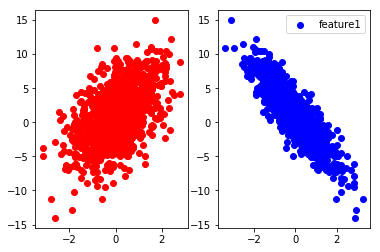

In [167]:
num_inputs = 2  # 输入特征个数
num_examples = 1000 # 样本数

# 真实的权重w 和偏差 b
true_w = nd.array([2,-3.4])
true_b = 4.2

# 生成输入项
features = nd.random.normal(scale = 1,shape = (num_examples,num_inputs))

labels = nd.dot(features,true_w.T) + b
labels += nd.random.normal(scale = 0.01,shape = labels.shape)

# 画图 
plt.figure(1)

plt.subplot(1,2,1)
plt.scatter(features[:,0].asnumpy(),labels.asnumpy(),label = "feature0",color='red')

plt.subplot(1,2,2)
plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),label = "feature1",color='blue')

plt.legend()
plt.show()

#### <font color='blue'>**2、读取数据**</font>

根据batch_size 遍历数据并读取小批量数据样本。

In [168]:
def data_iter(batch_size,features,labels):

    num_examples = len(features)
    indices = list(range(num_examples))

    # 打乱features的读取顺序
    random.shuffle(indices)
    # print(indices)

    for i in range(0,num_examples,batch_size):
        # print(i,min(i+batch_size,num_examples))
        j = nd.array(indices[i:min(i + batch_size , num_examples)])
        yield features.take(j),labels.take(j)


<font color='red' size=2><i><b>一个带有 "yield" 的函数就是一个generator；它和普通的函数不同，生成一个generator看起来像函数调用，但是不会执行任何函数代码，直到对其调用 next() ( 在 for 循环中会自动调用next() ) 才开始执行。虽然执行流程仍按函数的流程执行，但每执行到一个yield语句就会中断，并返回一个迭代值，下次执行时从yield的下一个语句继续执行。看起来就好像一个函数在正常执行的时候被yield中断了数次，每次都会通过yield返回当前值。
yield的好处显而易见，把一个函数改写成一个generator就会获得迭代能力，比起用类的实例保存状态来计算下一个next()的值，不仅代码简洁，而且执行流程异常清晰。 </b></i></font>

In [169]:
batch_size = 10 
data_iter(batch_size,features,labels)

<generator object data_iter at 0x000001E07D4DE410>

In [ ]:
temp_i = 0
for X,y in data_iter(batch_size,features,labels):
    print("i=",temp_i,X,y)
    temp_i +=1 

#### <font color='blue'>**3、初始化模型参数**</font>


In [170]:
# 初始化权重和偏差
w = nd.random.normal(scale = 0.01,shape = (num_inputs,1)) # num_inputs 输入的特征个数
b = nd.zeros(shape=(1,))

# 创建权重和偏差的梯度，之后会对它们求导
w.attach_grad()
b.attach_grad()



#### <font color='blue'>**4、定义模型**</font>


In [171]:
def linreg(X,w,b):
    return nd.dot(X,w) + b 


#### <font color='blue'>**5、策略：定义损失函数**</font>

使用平方损失来定义线性回归的损失函数。

In [172]:
def squared_loss(y_hat,y): # y_hat：预测值； y: 真实值
    return nd.power(y_hat - y.reshape(y_hat.shape) , 2)/2

#### <font color='blue'>**6、算法：定义优化算法**</font>

使用小批量随机梯度下降算法。通过不断迭代参数来优化损失函数。

In [181]:
def sgd(params,lr,batch_size): 
    '''
    params ：需要求导的参数，这里指的是w、b
    lr：学习率
    batch_size: 小批量的样本数
    '''
    for param in params:
        param[:] = param - lr * param.grad / batch_size
        


#### <font color='blue'>**7、训练模型**</font>

多次迭代模型参数。在每次迭代中，根据当前读取的小批量数据样本，通过反向函数 backward 计算小批量样本的梯度，并调用优化算法迭代模型参数。

在一个迭代周期（epoch）中，我们将完整遍历一遍 data_iter函数，并对训练数据集中所有样本使用一次。

在实践中，大多数超参数都需要通过反复试错来不断调节。虽然迭代周期设得越大模型可能越有效，但是训练时间可能过长。

In [174]:
lr = 0.05 # 学习率 
num_epochs = 10 # 迭代周期
net = linreg # 神经元上上面定义的线性模型
loss =squared_loss # 损失函数是上面定义的平方损失函数
batch_size = 10 # 批大小

for epoch in range(num_epochs): # 训练模型一共需要num_epochs 个迭代周期
    # 每个迭代周期，都会将训练数据全部训练一次
    for X,y in data_iter(batch_size,features,labels) :
        with autograd.record(): # 调用 autograd.record 函数来记录与梯度相关的计算
            l = loss(net(X,w,b), y ) ## y_hat = lonreg(X,w,b); l = squared_loss(y_hat,y)
        
        l.backward() # 小批量地损失函数对模型参数求梯度
        
        sgd( [w,b], lr,batch_size) # 使得小批量随机梯度下降迭代模型参数
        
    # print("epoch:",epoch+1, w,b)
    train_l = loss( net(features,w,b) , labels ) # 根据迭代得到的w,b,计算最终损失函数
    print("epoch %d loss %f" % (epoch+1, train_l.mean().asnumpy()))
    # print(w,b)
            

epoch 1 loss 0.000173
epoch 2 loss 0.000052
epoch 3 loss 0.000051
epoch 4 loss 0.000051
epoch 5 loss 0.000051
epoch 6 loss 0.000052
epoch 7 loss 0.000052
epoch 8 loss 0.000052
epoch 9 loss 0.000051
epoch 10 loss 0.000051


***
### **简洁实现**
***

In [176]:
######################################## 1、生成 数据 

num_inputs = 2  # 输入特征个数
num_examples = 1000 # 样本数

# 真实的权重w 和偏差 b
true_w = nd.array([2,-3.4])
true_b = 4.2

# 生成输入项
features = nd.random.normal(scale = 1,shape = (num_examples,num_inputs))

labels = nd.dot(features,true_w.T) + b
labels += nd.random.normal(scale = 0.01,shape = labels.shape)

######################################## 2、读取数据
# 使用 gluon的data包读取数据
from mxnet.gluon import data as gdata 

batch_size = 10 
# 将训练数据分成特征和标签组合 
dataset = gdata.ArrayDataset(features,labels)
dataset[0]

# 随机读取小批量
data_iter = gdata.DataLoader(dataset,batch_size,shuffle=True)


######################################## 3、定义模型
from mxnet.gluon import nn 

# Sequential 实例可以看作是串联各个层的容器，
#在构造模型时，在该容器中添加层 当给定输入数据时，容器中的每一层将依次计算并将输出作为下一层的输入
net = nn.Sequential()  

# 添加一个全连接层，定义该层的输入个数为1
net.add(nn.Dense(1))

######################################## 4、初始化模型参数
from mxnet import init 

# init 模块提供了模型参数初始化的各种方法。
# init.Normal(sigma = 0.01)) 指定权重参数每个元素将在初始化时随机采样于均值为0、标准差为0.01的正太分布，偏差参数默认初始为0

net.initialize(init.Normal(sigma = 0.01)) 

######################################## 5、策略：定义损失函数
from mxnet.gluon import loss as gloss 
loss = gloss.L2Loss() # L2范数 即平方损失 

######################################## 6、算法：定义优化算法
from mxnet import gluon 
# 创建一个Trainer实例，指定学习率 0.03 的小批量随机梯度下降（sgd)为优化算法。 
# 该优化算法将用来迭代 net 实例 所有通过 add 函数嵌套的层所包含的全部参数。这些参数可以通过 collect_params 获取
trainer = gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':0.03})


######################################## 7、训练模型
num_epochs = 3 
for epoch in range(1,num_epochs+1):
    for X,y in data_iter:
        with autograd.record():
            l = loss( net(X), y)
        l.backward()
        
        # 使用 train.step 来迭代模型参数
        # new_w = w - (lr/batch_size)* 求导结果：   param - lr * param.grad / batch_size
        
        trainer.step(batch_size)  
    l = loss(net(features),labels)
    
    print("epoch %d loss %f" %(epoch,l.mean().asnumpy()))


epoch 1 loss 0.013017
epoch 2 loss 0.000079
epoch 3 loss 0.000052


In [ ]:
help(gluon)

**步骤：**

1、模型 ： 定义 模型函数 如 $f(x) =  wx + b$ 

2、权重：初始化权重值，$w,b$

3、策略：定义损失函数，如 平方损失（L2范数）或其他： $L(w,b) = \frac{1}{2} (\hat{y} - y) ^2$

4、算法：定义使损失函数 $L(w,b)$ 极小化的算法，如求导，或其他

5、训练模型：定义num_epoch（迭代周期），根据2，3求得使 损失函数 $L(w,b)$ 最小的 权重值 $w^*,b^*$ ,得到输出模型 $\hat{f}(x) = w^* x + b^*$ 用于预测，并计算最终损失：
#### $$loss = \frac{1}{2} (\hat{y} - y) ^2 = \frac{1}{2} (w^* x + b^* - y) ^2 $$

In [ ]:
help(init)